# Dimensionality Reduction

Robin Burke
March 12, 2020

### Imports

In [14]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
#from prince import MCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns

### Read the data

In [10]:
data = pd.read_csv('Data/scoredTrainingData.csv')

cols = data.columns

print (data.shape)

data.head()


(44102, 86)


,UNIQUE_ID,Overall_Rating,Technical_Skills,Teamwork,Customer_Service,Hire_Again,High_Performer,Protected_Group,Biodata_01,Biodata_02,...,average_S4,average_S5,average_S6,average_S7,average_S8,average_S9,average_S10,average_S11,average_S12,average_S13
0,245021089,3.0,3.0,4.0,4.0,4.0,0.0,0.0,2.0,3.0,...,1.50,3.75,4.25,2.0,3.25,1.0,1.0,1.00,1.25,2.25
1,245181465,5.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,5.0,...,1.00,3.25,3.75,1.0,2.25,1.0,1.0,1.00,1.00,2.25
2,229682665,3.0,3.0,3.0,3.0,4.0,0.0,1.0,2.0,3.0,...,2.50,1.75,4.50,1.0,1.00,1.0,1.0,2.50,1.00,2.00
3,245174982,4.0,4.0,4.0,4.0,5.0,1.0,0.0,2.0,1.0,...,2.00,3.00,3.75,1.0,2.00,1.0,2.0,2.25,1.50,2.25
4,244979030,2.0,2.0,3.0,2.0,3.0,0.0,0.0,3.0,1.0,...,3.25,4.00,5.00,2.0,2.00,1.0,2.5,4.00,1.25,2.00


### Extract the biodata columns

In [17]:
bio_cols = cols[cols.str.contains('Biodata_')]
bio_df = data.loc[:, bio_cols].copy()
#bio_df.dropna(inplace=True)
#bio_df = bio_df.astype('int')

bio_df.head()

,Biodata_01,Biodata_02,Biodata_03,Biodata_04,Biodata_05,Biodata_06,Biodata_07,Biodata_08,Biodata_09,Biodata_10,Biodata_11,Biodata_12,Biodata_13,Biodata_14,Biodata_15,Biodata_16,Biodata_17,Biodata_18,Biodata_19,Biodata_20
0,2.0,3.0,2.0,2.0,2.0,1.0,3.0,7.0,2.0,5.0,2.0,2.0,4.0,1.0,2.0,5.0,2.0,1.0,4.0,1.0
1,2.0,5.0,5.0,2.0,3.0,1.0,1.0,5.0,2.0,6.0,1.0,1.0,4.0,3.0,2.0,5.0,2.0,4.0,6.0,1.0
2,2.0,3.0,1.0,1.0,2.0,2.0,2.0,8.0,5.0,7.0,1.0,2.0,1.0,2.0,2.0,5.0,2.0,5.0,1.0,1.0
3,2.0,1.0,2.0,7.0,1.0,1.0,2.0,1.0,7.0,1.0,1.0,2.0,4.0,3.0,2.0,5.0,7.0,7.0,2.0,1.0
4,3.0,1.0,6.0,6.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,4.0,4.0,3.0,1.0,3.0,1.0,3.0,1.0


In [18]:
bio_corr = bio_df.corr()

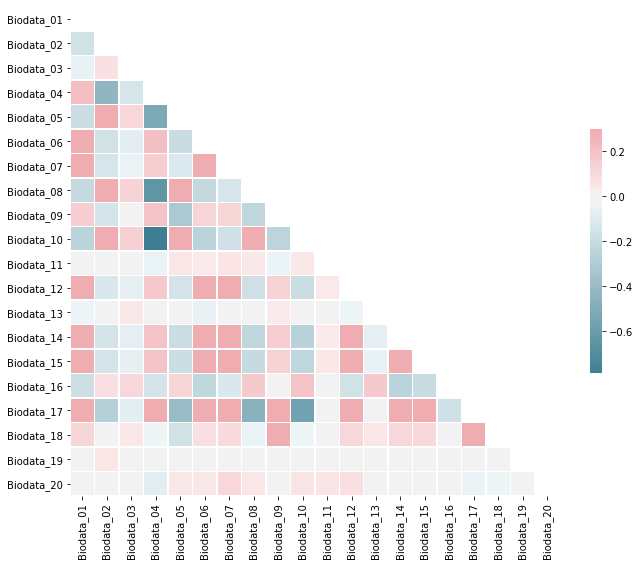

In [19]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(bio_corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(bio_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Maybe drop Bio 4? Otherwise, not a lot of correlation.

In [21]:
time_cols = cols[cols.str.contains('_Time')]
time_df = data.loc[:, time_cols].copy()
time_df.head()

,SJ_Time_1,SJ_Time_2,SJ_Time_3,SJ_Time_4,SJ_Time_5,SJ_Time_6,SJ_Time_7,SJ_Time_8,SJ_Time_9,Scenario1_Time,Scenario2_Time
0,95.0,101.0,39.0,69.0,65.0,64.0,37.0,64.0,73.0,35.0,58.0
1,53.0,57.0,43.0,53.0,40.0,32.0,39.0,43.0,103.0,37.0,40.0
2,89.0,73.0,90.0,100.0,78.0,66.0,65.0,81.0,70.0,118.0,51.0
3,110.0,86.0,52.0,109.0,103.0,72.0,79.0,59.0,140.0,75.0,63.0
4,35.0,21.0,32.0,81.0,46.0,32.0,31.0,37.0,71.0,66.0,104.0


In [25]:
bio_aug_df = pd.concat([bio_df, time_df], axis=1)

In [26]:
bio_aug_corr = bio_aug_df.corr()

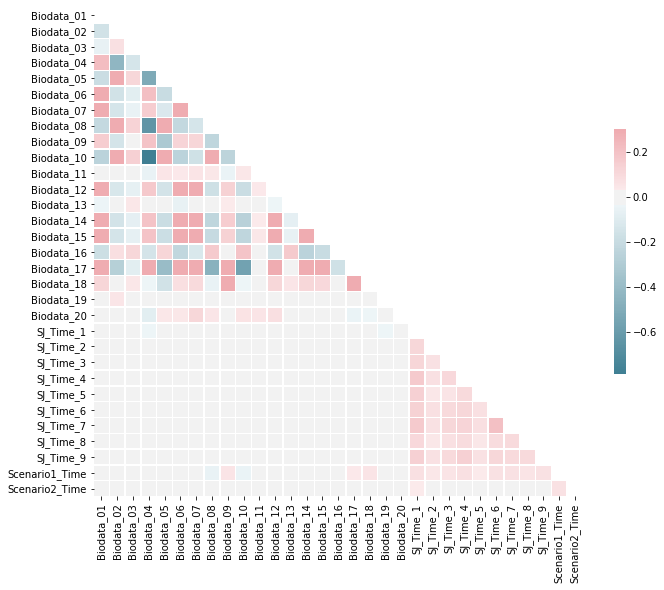

In [27]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(bio_aug_corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(bio_aug_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

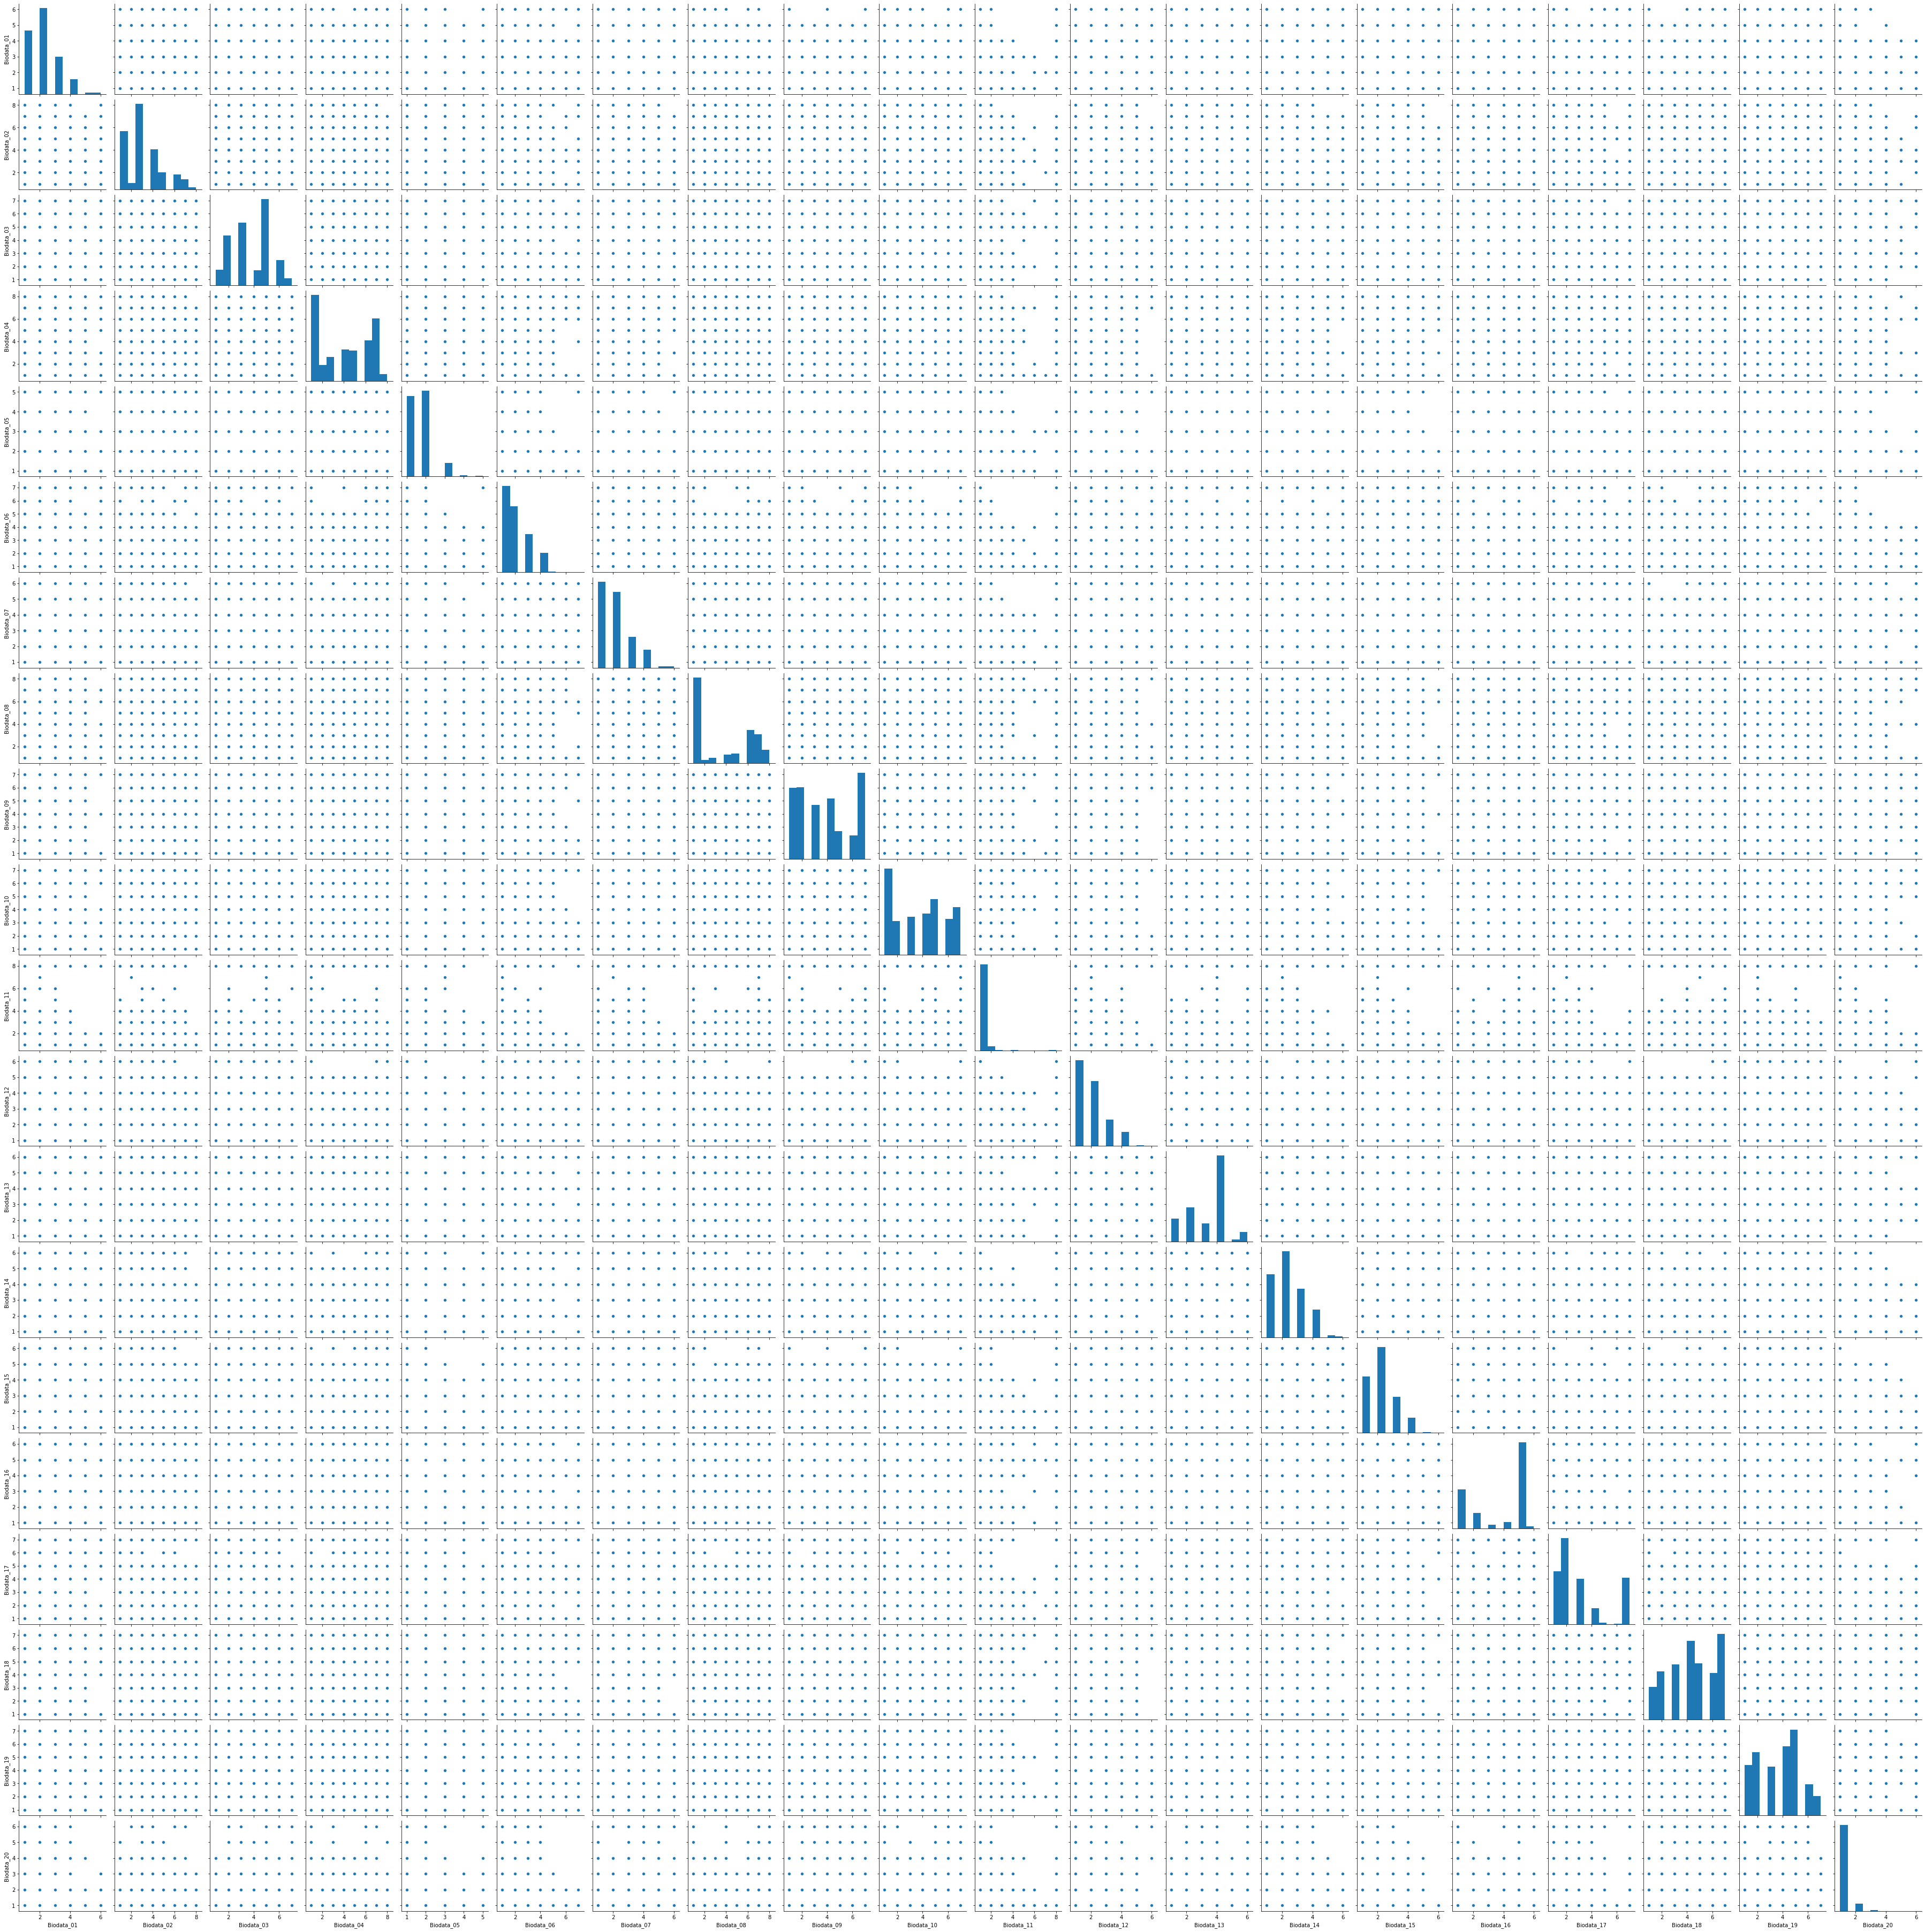

In [28]:
sns.pairplot(bio_df)

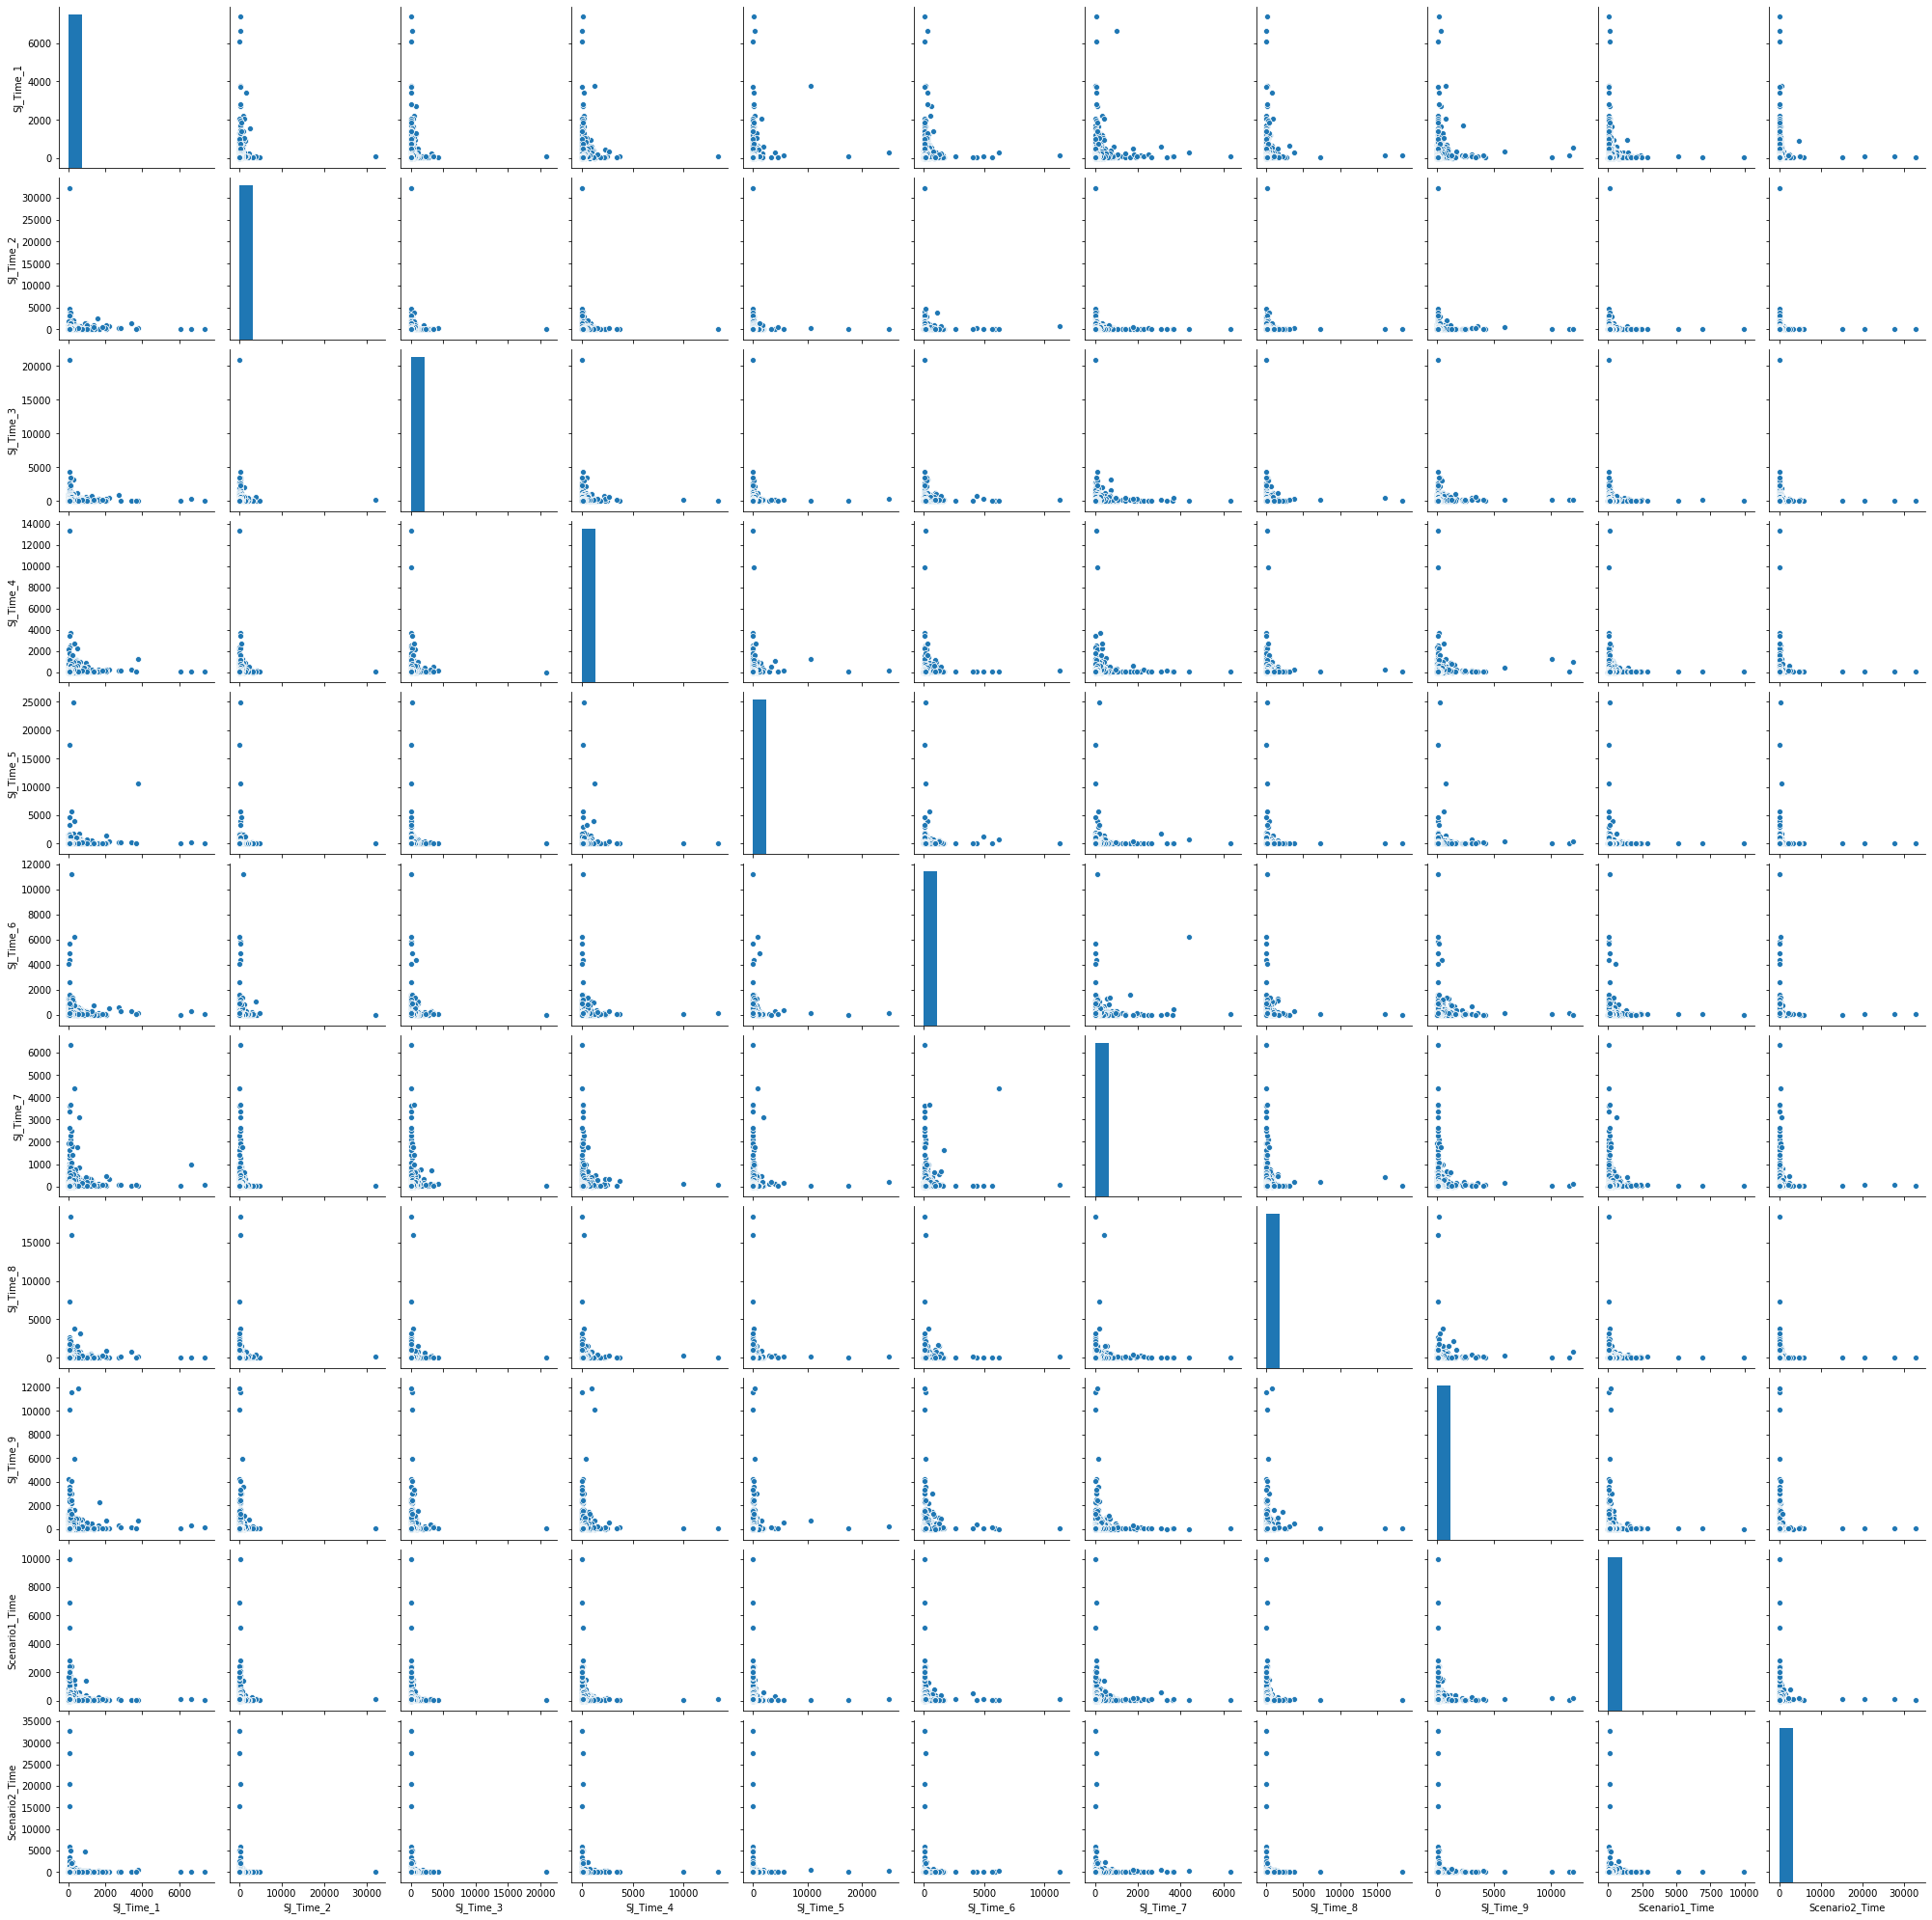

In [29]:
sns.pairplot(time_df)

In [39]:
time_log_df = time_df.transform(np.log)
time_log_df = time_log_df.replace([np.inf, -np.inf], np.nan).dropna()
time_log_df.head()

,SJ_Time_1,SJ_Time_2,SJ_Time_3,SJ_Time_4,SJ_Time_5,SJ_Time_6,SJ_Time_7,SJ_Time_8,SJ_Time_9,Scenario1_Time,Scenario2_Time
0,4.553877,4.615121,3.663562,4.234107,4.174387,4.158883,3.610918,4.158883,4.290459,3.555348,4.060443
1,3.970292,4.043051,3.761200,3.970292,3.688879,3.465736,3.663562,3.761200,4.634729,3.610918,3.688879
2,4.488636,4.290459,4.499810,4.605170,4.356709,4.189655,4.174387,4.394449,4.248495,4.770685,3.931826
3,4.700480,4.454347,3.951244,4.691348,4.634729,4.276666,4.369448,4.077537,4.941642,4.317488,4.143135
4,3.555348,3.044522,3.465736,4.394449,3.828641,3.465736,3.433987,3.610918,4.262680,4.189655,4.644391


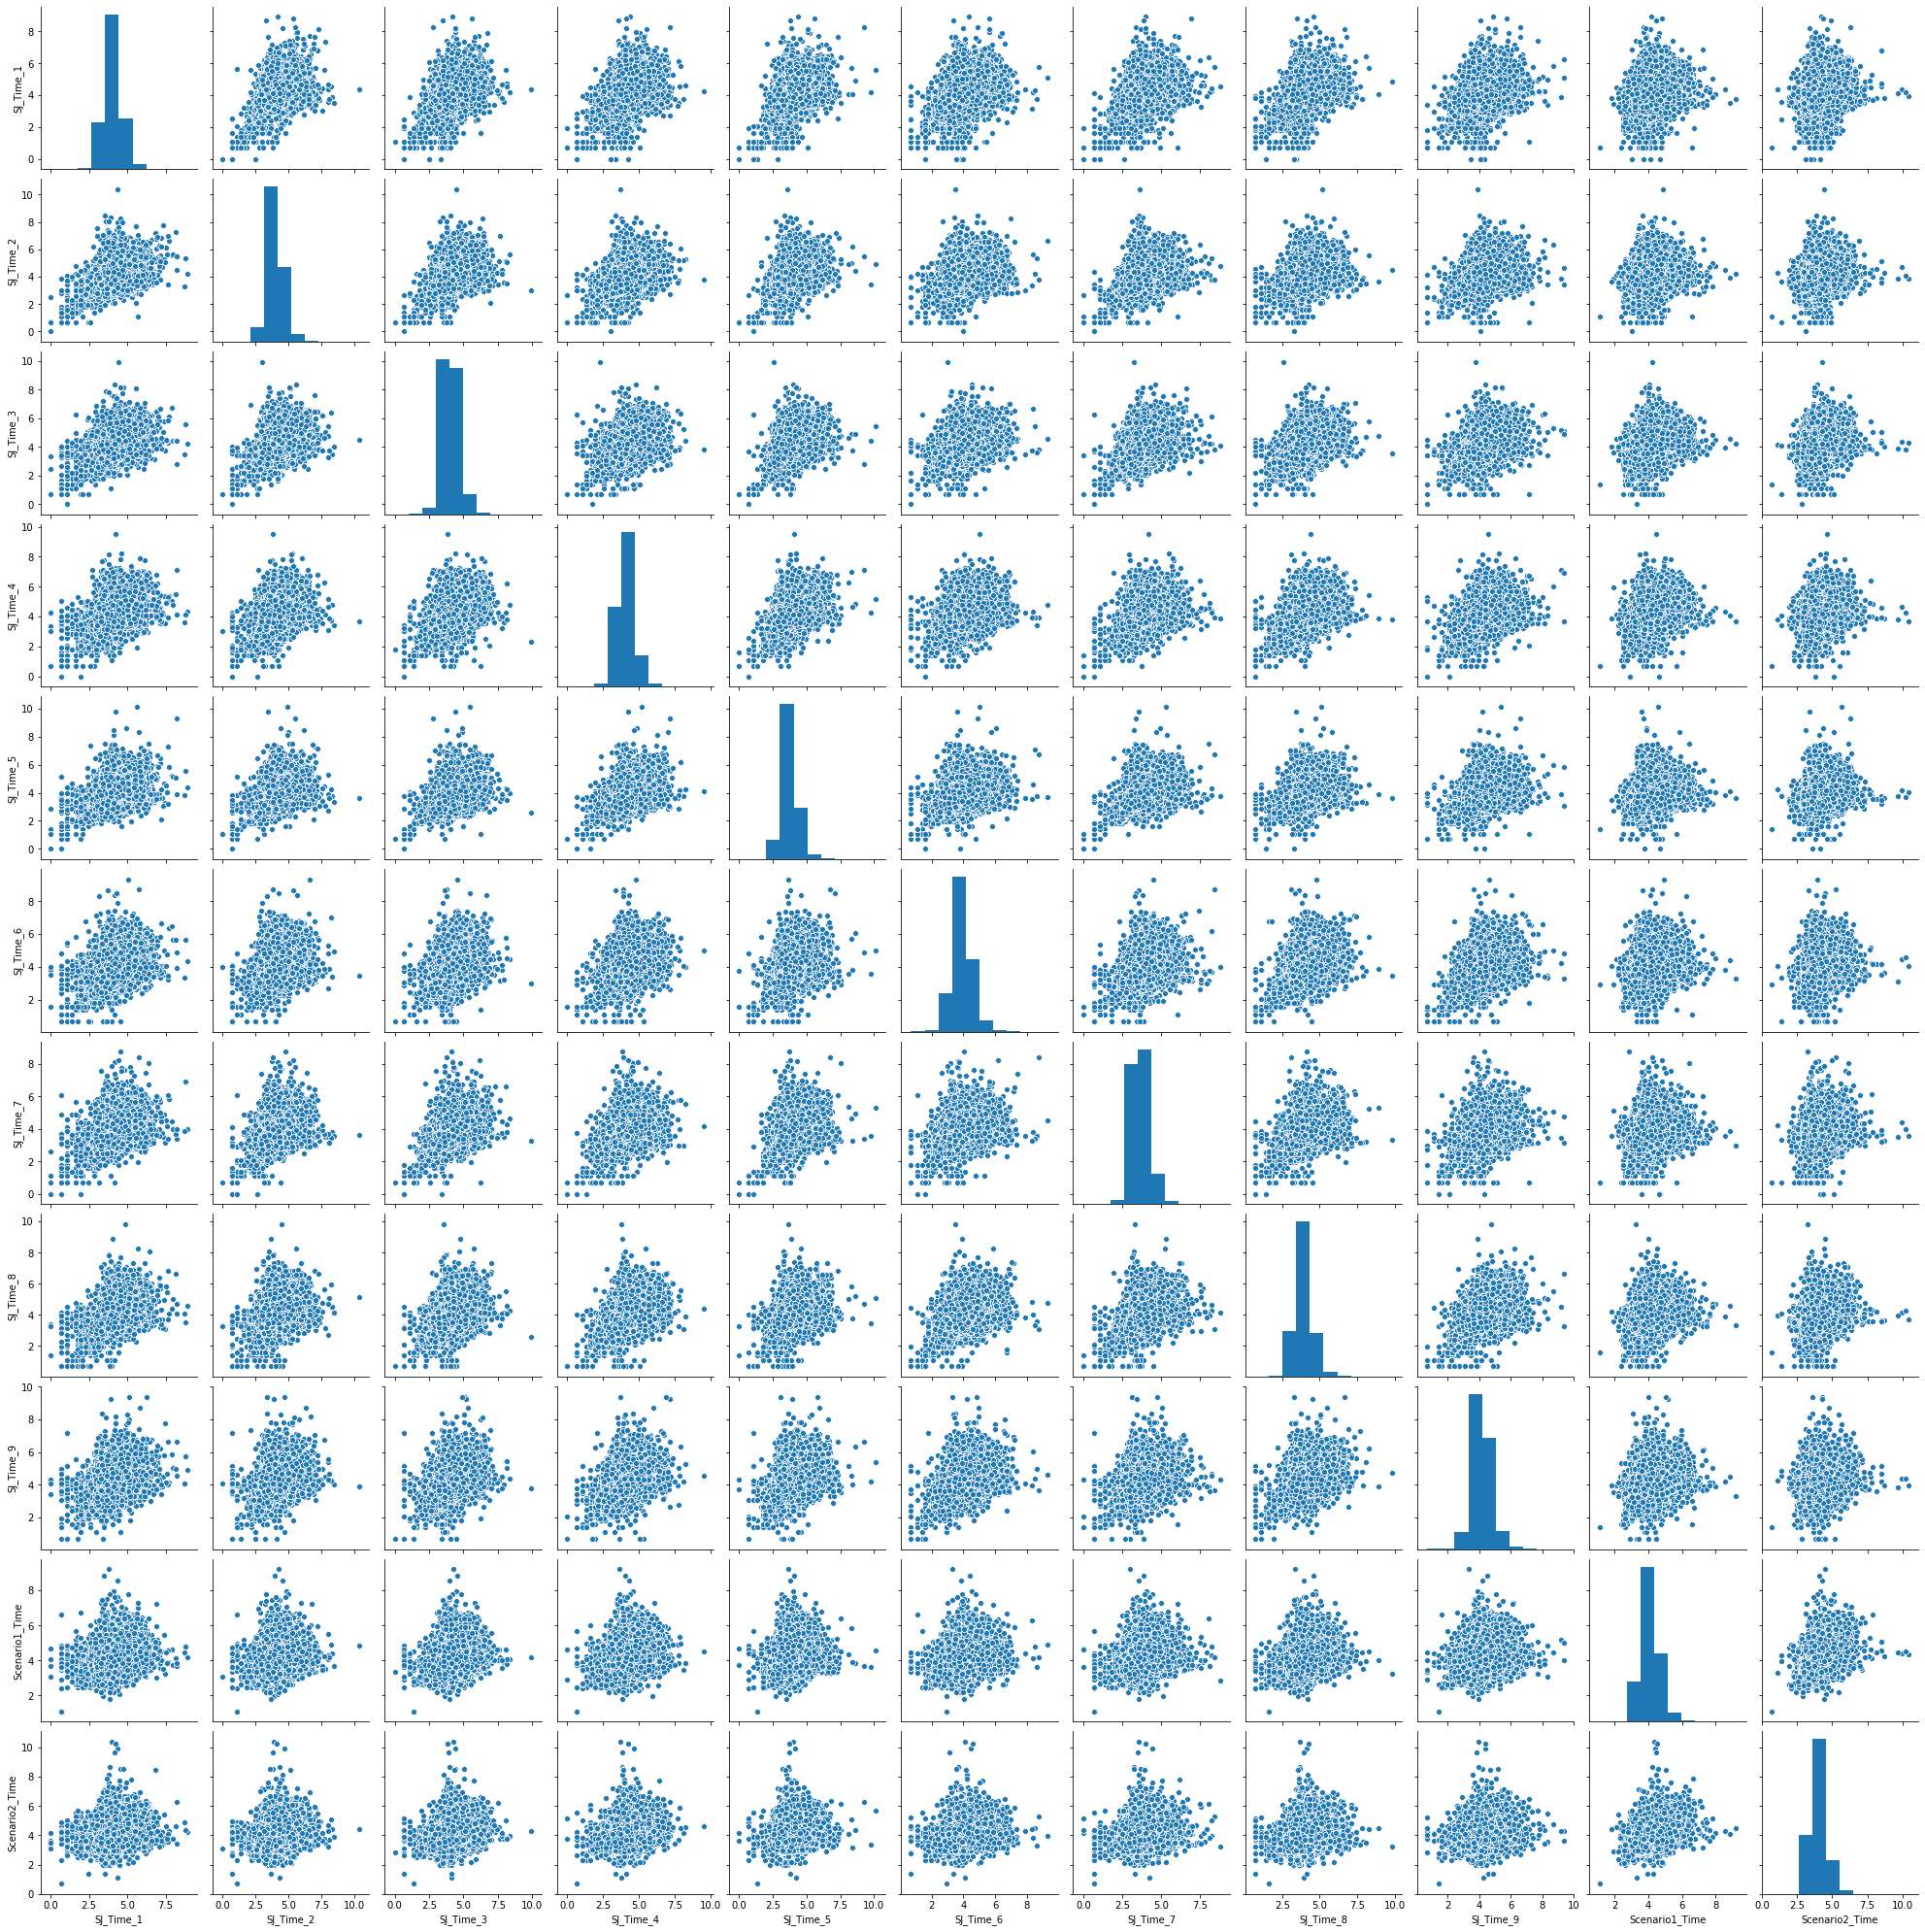

In [40]:
sns.pairplot(time_log_df)

In [42]:
bio_aug_df = pd.concat([bio_df, time_log_df], axis=1)

In [43]:
bio_aug_corr = bio_aug_df.corr()

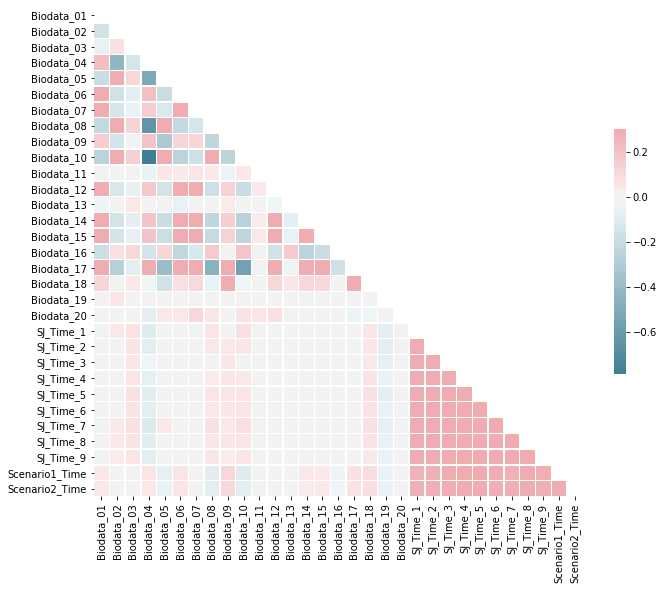

In [44]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(bio_aug_corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(bio_aug_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Extract the situational judgement columns

Right now am ignoring the time. This could be an interesting variable, too. We will come back and look at the rows with missing data later.

In [83]:
sj_cols = cols[cols.str.contains('SJ_[Most|Least]')]
sj_df = data.loc[:, sj_cols].copy()
sj_df.dropna(inplace=True)
sj_df = sj_df.astype('int')

sj_df.head()

,SJ_Most_1,SJ_Least_1,SJ_Most_2,SJ_Least_2,SJ_Most_3,SJ_Least_3,SJ_Most_4,SJ_Least_4,SJ_Most_5,SJ_Least_5,SJ_Most_6,SJ_Least_6,SJ_Most_7,SJ_Least_7,SJ_Most_8,SJ_Least_8,SJ_Most_9,SJ_Least_9
0,3,4,3,2,1,4,1,2,2,4,2,4,4,3,1,4,1,3
1,3,4,3,2,1,4,1,2,2,3,3,4,1,4,1,3,2,4
2,2,4,1,4,1,3,1,2,1,3,2,4,1,3,1,3,1,4
3,2,1,1,2,1,4,1,2,2,4,4,1,1,2,2,3,3,4
4,3,2,3,2,1,4,2,3,2,3,2,4,1,2,1,4,1,3


Convert to dummy variables because these are different options that employees picked

In [84]:
mca = MCA(n_components=5)
mca.fit(sj_df)

MCA(check_input=True, copy=True, engine='auto', n_components=5, n_iter=10,
    random_state=None)

In [85]:
mca.explained_inertia_

[0.042490579748388456,
 0.036074806458672046,
 0.03414276018714455,
 0.029040037555755002,
 0.02616090548282249]

Doesn't seem very promising

### Extract the personality scale columns

In [54]:
ps_cols = cols[cols.str.contains('PScale')]
ps_df = data.loc[:, ps_cols].copy()
ps_df.dropna(inplace=True)
ps_df = ps_df.astype('int')

ps_df.head()

,PScale01_Q1,PScale01_Q2,PScale01_Q3,PScale01_Q4,PScale02_Q1,PScale02_Q2,PScale02_Q3,PScale02_Q4,PScale03_Q1,PScale03_Q2,...,PScale11_Q4,PScale12_Q1,PScale12_Q2,PScale12_Q3,PScale12_Q4,PScale13_Q1,PScale13_Q2,PScale13_Q3,PScale13_Q4,PScale13_Q5
0,4,1,1,4,3,1,4,4,1,3,...,1,1,1,3,4,1,2,3,2,1
1,4,1,1,4,4,1,4,4,1,4,...,1,1,1,4,4,2,1,4,4,4
2,4,1,1,4,4,1,4,4,1,4,...,4,1,1,4,4,1,1,4,4,4
3,3,3,3,3,4,1,4,3,1,4,...,2,1,1,2,4,1,1,3,3,3
4,2,3,3,2,3,2,3,2,1,3,...,4,2,1,4,4,2,1,4,3,2


## PCA on the personality scales

In [96]:
pca = PCA(n_components=30)
pca.fit(ps_df)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [97]:
pca.explained_variance_ratio_.sum()

0.8500290755036111

In [98]:
ps_df.shape

(39259, 55)

OK. It is possible to reduce the dimensionality by 40% or so.

## Looking at individual scales

In [56]:
sc1 = ps_df.iloc[:, 0:4]

sc1.head()

,PScale01_Q1,PScale01_Q2,PScale01_Q3,PScale01_Q4
0,4,1,1,4
1,4,1,1,4
2,4,1,1,4
3,3,3,3,3
4,2,3,3,2


## Clustering the first scale

### Two clusters

In [64]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(sc1)

kmeans.cluster_centers_

array([[3.30481731, 1.4208983 , 1.57654177, 3.39390272],
       [1.67576235, 2.74243277, 2.91133116, 1.62687071]])

In [65]:
cluster_labels = kmeans.fit_predict(sc1)
silhouette_score(sc1, cluster_labels)


0.42959542469031886

### Three clusters

In [61]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(sc1)

kmeans.cluster_centers_

array([[3.74870119, 1.14069046, 1.27333669, 3.80668678],
       [1.56874108, 3.16880826, 3.29369279, 1.52280171],
       [2.42398495, 1.81138929, 2.02386821, 2.48235828]])

In [62]:
cluster_labels = kmeans.fit_predict(sc1)
silhouette_score(sc1, cluster_labels)

In [63]:
silhouette_avg

0.3504041872726267

### Four clusters

In [66]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(sc1)

kmeans.cluster_centers_

array([[1.68442889, 1.73201089, 2.0210035 , 1.52975496],
       [2.84799113, 2.01808411, 2.28746908, 3.02772328],
       [3.75837254, 1.06245964, 1.14632346, 3.81585017],
       [1.52192787, 3.42152716, 3.42709261, 1.46716385]])

In [67]:
cluster_labels = kmeans.fit_predict(sc1)
silhouette_score(sc1, cluster_labels)

0.364890618770901

As expected, there is decent clustering of the individual personality scales. Another option would to try to cluster the whole set at once. 

### Need to do similar for the other questions

In [ ]:
ps_cols = cols[cols.str.contains('PScale')]
ps_df = data.loc[:, ps_cols].copy()
ps_df.dropna(inplace=True)
ps_df = ps_df.astype('int')

ps_df.head()

In [41]:
np.isnan(0)

False